# Note: the dataframe to run this notebook has now changed because we changed the model structure where LBWSG to affect ACMR


In [2]:
!whoami
!date

nicoly
Wed Sep 23 02:27:09 PDT 2020


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
store = pd.HDFStore('/share/costeffectiveness/artifacts/vivarium_gates_bep/india.hdf')
#this file is where everything for LBWSG is by country

In [6]:
store.keys()

['/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_0',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_1',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_10',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_100',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_101',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_102',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_103',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_104',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_105',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_106',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_107',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_108',
 '/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_109',
 '/r

In [7]:
index = store.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/index')
index.head()

#the unique values in affected_entity is now 'all'. THis is a change when we decided to model LBWSG to affect ALL cause mortality. 

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter
0,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat10
1,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat106
2,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat11
3,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat116
4,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat117


In [8]:
index.affected_measure.nunique()

1

In [9]:
index.affected_measure.value_counts()

excess_mortality_rate    73416
Name: affected_measure, dtype: int64

In [10]:
index.affected_entity.value_counts()

all    73416
Name: affected_entity, dtype: int64

In [11]:
df = store.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_0')
df.head()

0    968.702386
1    171.751901
2    513.870580
3    182.396469
4     61.431240
Name: draw_0, dtype: float64

In [12]:
#merge index table and relative risk table to match the relative risk with the approrpiate rows
#Each row specifies the RR for that lbssg category and the relative risk for the affected measure.

merged = index.merge(df, right_index=True, left_index=True)
merged.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,draw_0
0,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat10,968.702386
1,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat106,171.751901
2,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat11,513.870580
3,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat116,182.396469
4,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat117,61.431240


In [13]:
np.unique(merged['affected_measure'])

array(['excess_mortality_rate'], dtype=object)

In [14]:
nn = merged.where(merged['affected_entity'].str.contains('all')).dropna()
nn = nn.where(nn['year_start'] == 2017).dropna()

# create a number for categories of exposure so that it can be easily plotted for comparison 
    # across subtypes

cats = ['cat10', 'cat106', 'cat11', 'cat116', 'cat117', 'cat123', 'cat14',
       'cat15', 'cat17', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22',
       'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29',
       'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36',
       'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43',
       'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50',
       'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat8',
       'cat80', 'cat81', 'cat82', 'cat88', 'cat89', 'cat90', 'cat95',
       'cat96']
nums = list(range(0,57))
cat_nums = pd.DataFrame()
cat_nums['parameter'] = cats
cat_nums['num'] = nums

nn = nn.merge(cat_nums, right_on='parameter', left_on='parameter')
nn.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,draw_0,num
0,India,Female,0.000000,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat10,968.702386,0
1,India,Female,0.019178,0.076712,2017.0,2018.0,all,excess_mortality_rate,cat10,451.886057,0
2,India,Female,0.076712,1.000000,2017.0,2018.0,all,excess_mortality_rate,cat10,1.000000,0
3,India,Female,1.000000,5.000000,2017.0,2018.0,all,excess_mortality_rate,cat10,1.000000,0
4,India,Female,5.000000,10.000000,2017.0,2018.0,all,excess_mortality_rate,cat10,1.000000,0


In [15]:
np.unique(nn['affected_entity'])

array(['all'], dtype=object)

In [16]:
early_nn_female = nn.where(nn['sex'] == 'Female').where(nn['age_start'] == 0).dropna()
early_nn_male = nn.where(nn['sex'] == 'Male').where(nn['age_start'] == 0).dropna()
late_nn_female = nn.where(nn['sex'] == 'Female').where(nn['age_start'] == 1.917808e-02).dropna()
late_nn_male = nn.where(nn['sex'] == 'Male').where(nn['age_start'] == 1.917808e-02).dropna()
post_nn_female = nn.where(nn['sex'] == 'Female').where(nn['age_start'] == 7.671233e-02).dropna()
post_nn_male = nn.where(nn['sex'] == 'Male').where(nn['age_start'] == 7.671233e-02).dropna()

In [17]:
early_nn_female.where(early_nn_female['affected_entity'] == 'all').dropna()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,draw_0,num
0,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat10,968.702386,0.0
46,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat106,171.751901,1.0
92,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat11,513.870580,2.0
138,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat116,182.396469,3.0
184,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat117,61.431240,4.0
230,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat123,93.468851,5.0
276,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat14,194.476548,6.0
322,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat15,227.822495,7.0
368,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat17,289.968965,8.0
414,India,Female,0.0,0.019178,2017.0,2018.0,all,excess_mortality_rate,cat19,178.636901,9.0


ValueError: x and y must have same first dimension, but have shapes (57,) and (0,)

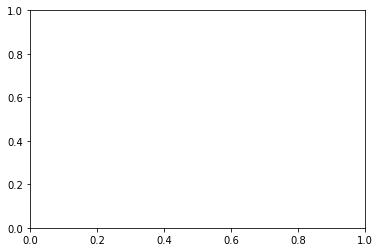

In [18]:
plt.plot(early_nn_female['num'].where(early_nn_female['affected_entity'] == 'all').dropna(),early_nn_female['draw_0'].where(early_nn_female['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(early_nn_female['num'].where(early_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),early_nn_female['draw_0'].where(early_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(early_nn_female['num'].where(early_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),early_nn_female['draw_0'].where(early_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(early_nn_female['num'].where(early_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna(),early_nn_female['draw_0'].where(early_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(early_nn_female['num'].where(early_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),early_nn_female['draw_0'].where(early_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
plt.plot(early_nn_male['num'].where(early_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna(),early_nn_male['draw_0'].where(early_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(early_nn_male['num'].where(early_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),early_nn_male['draw_0'].where(early_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(early_nn_male['num'].where(early_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),early_nn_male['draw_0'].where(early_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(early_nn_male['num'].where(early_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna(),early_nn_male['draw_0'].where(early_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(early_nn_male['num'].where(early_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),early_nn_male['draw_0'].where(early_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
plt.plot(late_nn_female['num'].where(late_nn_female['affected_entity'] == 'other_neonatal_disorders').dropna(),late_nn_female['draw_0'].where(late_nn_female['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(late_nn_female['num'].where(late_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),late_nn_female['draw_0'].where(late_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(late_nn_female['num'].where(late_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),late_nn_female['draw_0'].where(late_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(late_nn_female['num'].where(late_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna(),late_nn_female['draw_0'].where(late_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(late_nn_female['num'].where(late_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),late_nn_female['draw_0'].where(late_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
plt.plot(late_nn_male['num'].where(late_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna(),late_nn_male['draw_0'].where(late_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(late_nn_male['num'].where(late_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),late_nn_male['draw_0'].where(late_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(late_nn_male['num'].where(late_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),late_nn_male['draw_0'].where(late_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(late_nn_male['num'].where(late_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna(),late_nn_male['draw_0'].where(late_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(late_nn_male['num'].where(late_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),late_nn_male['draw_0'].where(late_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
plt.plot(post_nn_female['num'].where(post_nn_female['affected_entity'] == 'other_neonatal_disorders').dropna(),post_nn_female['draw_0'].where(post_nn_female['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(post_nn_female['num'].where(post_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),post_nn_female['draw_0'].where(post_nn_female['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(post_nn_female['num'].where(post_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),post_nn_female['draw_0'].where(post_nn_female['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(post_nn_female['num'].where(post_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna(),post_nn_female['draw_0'].where(post_nn_female['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(post_nn_female['num'].where(post_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),post_nn_female['draw_0'].where(post_nn_female['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
plt.plot(post_nn_male['num'].where(post_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna(),post_nn_male['draw_0'].where(post_nn_male['affected_entity'] == 'other_neonatal_disorders').dropna())
plt.plot(post_nn_male['num'].where(post_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna(),post_nn_male['draw_0'].where(post_nn_male['affected_entity'] == 'hemolytic_disease_and_other_neonatal_jaundice').dropna())
plt.plot(post_nn_male['num'].where(post_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna(),post_nn_male['draw_0'].where(post_nn_male['affected_entity'] == 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma').dropna())
plt.plot(post_nn_male['num'].where(post_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna(),post_nn_male['draw_0'].where(post_nn_male['affected_entity'] == 'neonatal_preterm_birth').dropna())
plt.plot(post_nn_male['num'].where(post_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna(),post_nn_male['draw_0'].where(post_nn_male['affected_entity'] == 'neonatal_sepsis_and_other_neonatal_infections').dropna())
plt.legend(['other_neonatal_disorders',
           'hemolytic_disease_and_other_neonatal_jaundice',
           'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
           'neonatal_preterm_birth',
           'neonatal_sepsis_and_other_neonatal_infections'])

In [ ]:
menin = merged.where(merged['affected_entity'].str.contains('eningitis')).dropna()
menin = menin.where(merged['year_start'] == 2017).dropna()
menin.head()

In [ ]:
early_neonatal_female = menin.where(menin['age_start'] == 0).where(menin['sex'] == 'Female').dropna()
early_neonatal_male = menin.where(menin['age_start'] == 0).where(menin['sex'] == 'Male').dropna()
late_neonatal_female = menin.where(menin['age_start'] == 1.917808e-02).where(menin['sex'] == 'Female').dropna()
late_neonatal_male = menin.where(menin['age_start'] == 1.917808e-02).where(menin['sex'] == 'Male').dropna()
post_neonatal_female = menin.where(menin['age_start'] == 7.671233e-02).where(menin['sex'] == 'Female').dropna()
post_neonatal_male = menin.where(menin['age_start'] == 7.671233e-02).where(menin['sex'] == 'Male').dropna()

In [ ]:
# create a number for categories of exposure so that it can be easily plotted for comparison 
    # across subtypes

cats = ['cat10', 'cat106', 'cat11', 'cat116', 'cat117', 'cat123', 'cat14',
       'cat15', 'cat17', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22',
       'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29',
       'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36',
       'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43',
       'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50',
       'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat8',
       'cat80', 'cat81', 'cat82', 'cat88', 'cat89', 'cat90', 'cat95',
       'cat96']
nums = list(range(0,57))
cat_nums = pd.DataFrame()
cat_nums['parameter'] = cats
cat_nums['num'] = nums

early_neonatal_female = early_neonatal_female.merge(cat_nums, right_on='parameter', left_on='parameter')
early_neonatal_male = early_neonatal_male.merge(cat_nums, right_on='parameter', left_on='parameter')
late_neonatal_female = late_neonatal_female.merge(cat_nums, right_on='parameter', left_on='parameter')
late_neonatal_male = late_neonatal_male.merge(cat_nums, right_on='parameter', left_on='parameter')
post_neonatal_female = post_neonatal_female.merge(cat_nums, right_on='parameter', left_on='parameter')
post_neonatal_male = post_neonatal_male.merge(cat_nums, right_on='parameter', left_on='parameter')

In [ ]:
plt.plot(early_neonatal_female['num'].where(early_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        early_neonatal_female['draw_0'].where(early_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(early_neonatal_female['num'].where(early_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna(),
        early_neonatal_female['draw_0'].where(early_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(early_neonatal_female['num'].where(early_neonatal_female['affected_entity'] == 'other_meningitis').dropna(),
        early_neonatal_female['draw_0'].where(early_neonatal_female['affected_entity'] == 'other_meningitis').dropna())

plt.plot(early_neonatal_female['num'].where(early_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        early_neonatal_female['draw_0'].where(early_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for early neonatal females by subtype of meningitis')

In [ ]:
plt.plot(early_neonatal_male['num'].where(early_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        early_neonatal_male['draw_0'].where(early_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(early_neonatal_male['num'].where(early_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna(),
        early_neonatal_male['draw_0'].where(early_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(early_neonatal_male['num'].where(early_neonatal_male['affected_entity'] == 'other_meningitis').dropna(),
        early_neonatal_male['draw_0'].where(early_neonatal_male['affected_entity'] == 'other_meningitis').dropna())

plt.plot(early_neonatal_male['num'].where(early_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        early_neonatal_male['draw_0'].where(early_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for early neonatal males by subtype of meningitis')

In [ ]:
plt.plot(late_neonatal_female['num'].where(late_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        late_neonatal_female['draw_0'].where(late_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(late_neonatal_female['num'].where(late_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna(),
        late_neonatal_female['draw_0'].where(late_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(late_neonatal_female['num'].where(late_neonatal_female['affected_entity'] == 'other_meningitis').dropna(),
        late_neonatal_female['draw_0'].where(late_neonatal_female['affected_entity'] == 'other_meningitis').dropna())

plt.plot(late_neonatal_female['num'].where(late_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        late_neonatal_female['draw_0'].where(late_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for late neonatal females by subtype of meningitis')

In [ ]:
plt.plot(late_neonatal_male['num'].where(late_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        late_neonatal_male['draw_0'].where(late_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(late_neonatal_male['num'].where(late_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna(),
        late_neonatal_male['draw_0'].where(late_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(late_neonatal_male['num'].where(late_neonatal_male['affected_entity'] == 'other_meningitis').dropna(),
        late_neonatal_male['draw_0'].where(late_neonatal_male['affected_entity'] == 'other_meningitis').dropna())

plt.plot(late_neonatal_male['num'].where(late_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        late_neonatal_male['draw_0'].where(late_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for late neonatal males by subtype of meningitis')

In [ ]:
plt.plot(post_neonatal_female['num'].where(post_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        post_neonatal_female['draw_0'].where(post_neonatal_female['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(post_neonatal_female['num'].where(post_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna(),
        post_neonatal_female['draw_0'].where(post_neonatal_female['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(post_neonatal_female['num'].where(post_neonatal_female['affected_entity'] == 'other_meningitis').dropna(),
        post_neonatal_female['draw_0'].where(post_neonatal_female['affected_entity'] == 'other_meningitis').dropna())

plt.plot(post_neonatal_female['num'].where(post_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        post_neonatal_female['draw_0'].where(post_neonatal_female['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for post neonatal females by subtype of meningitis')

In [ ]:
plt.plot(post_neonatal_male['num'].where(post_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna(),
        post_neonatal_male['draw_0'].where(post_neonatal_male['affected_entity'] == 'h_influenzae_type_b_meningitis').dropna())

plt.plot(post_neonatal_male['num'].where(post_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna(),
        post_neonatal_male['draw_0'].where(post_neonatal_male['affected_entity'] == 'meningococcal_meningitis').dropna())

plt.plot(post_neonatal_male['num'].where(post_neonatal_male['affected_entity'] == 'other_meningitis').dropna(),
        post_neonatal_male['draw_0'].where(post_neonatal_male['affected_entity'] == 'other_meningitis').dropna())

plt.plot(post_neonatal_male['num'].where(post_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna(),
        post_neonatal_male['draw_0'].where(post_neonatal_male['affected_entity'] == 'pneumococcal_meningitis').dropna())

plt.legend(['h_influenzae_type_b_meningitis','meningococcal_meningitis',
           'other_meningitis','pneumococcal_meningitis'])
plt.title('LBWSG RRs for post neonatal males by subtype of meningitis')